# Data Analysis Assignment 2

## Part One: Exploring Data and Testing Hypotheses: Uncovering Insights from Dataset

In [14]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from math import sqrt
from scipy.stats import shapiro
from scipy.stats import skew

### Task 1: Data Preparation and Exploration (5 marks)

<b>Importing Data

In [3]:
# Read CSV
df = pd.read_csv("Employee_Performance.csv")

In [4]:
df.head()

,EmployeeID,Department,Gender,Experience,TrainingHours,PerformanceRating,Salary
0,1001,IT,Male,4,5,1.00,19000
1,1002,Marketing,Female,0,50,5.50,6900
2,1003,Sales,Male,0,5,1.00,6000
3,1004,HR,Male,1,5,1.00,6000
4,1005,HR,Female,9,5,1.04,38000


<b> Summary Statistics

In [5]:
df.describe()

,EmployeeID,Experience,TrainingHours,PerformanceRating,Salary
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,1734.500000,2.838556,32.144414,3.561512,16107.623297
std,423.919411,2.527657,10.106029,1.044987,12158.438481
min,1001.000000,0.000000,5.000000,1.000000,6000.000000
25%,1367.750000,1.000000,25.000000,2.840000,7700.000000
50%,1734.500000,2.000000,31.000000,3.630000,10100.000000
75%,2101.250000,4.000000,39.000000,4.330000,20000.000000
max,2468.000000,9.000000,50.000000,5.500000,53100.000000


<b> Distribution/Skew

0.9454708663112947


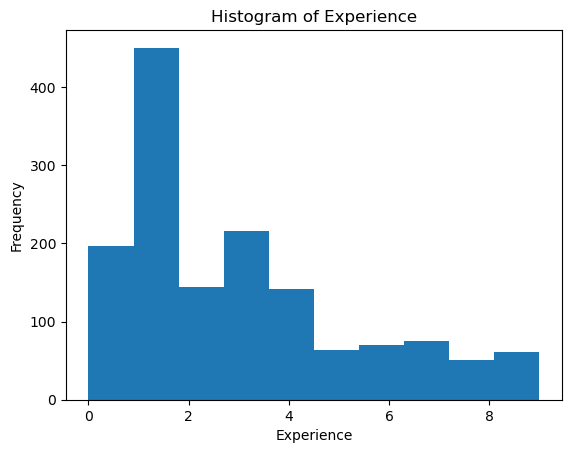

-0.38074145386444036


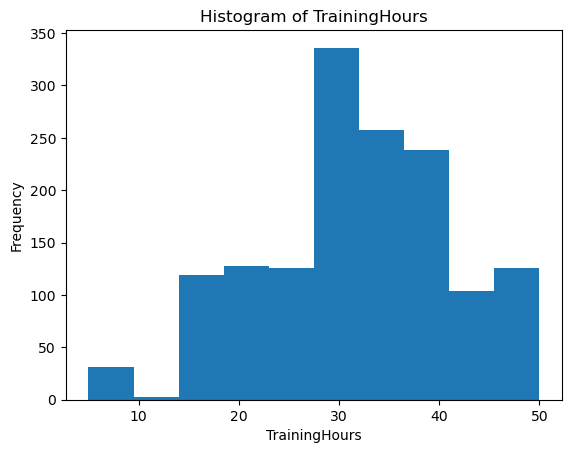

-0.30955689839475686


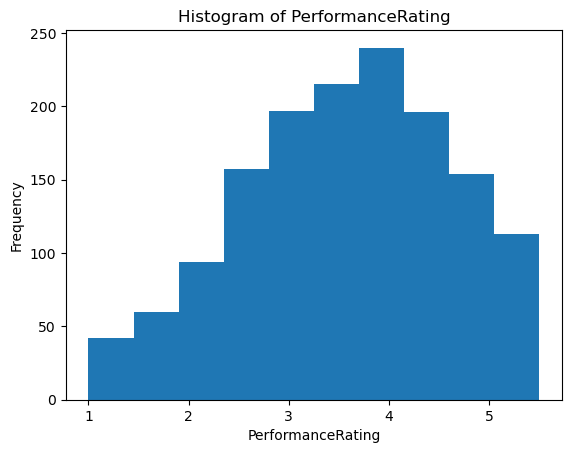

1.6313221731798433


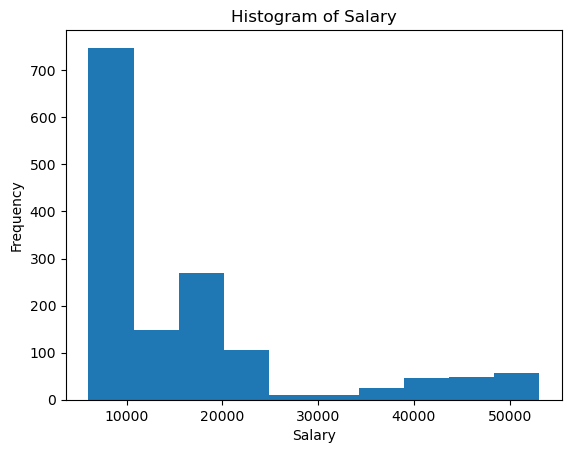

In [20]:
# Data Distribution
numerical_columns = ['Experience', 'TrainingHours', 'PerformanceRating', 'Salary']
for column in numerical_columns:
    skewness = df[column].skew()
    print(skewness)
    
    # Plot
    plt.hist(df[column].dropna(), bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

                   Experience  TrainingHours  PerformanceRating  Salary
Experience               1.00           0.08               0.30    0.96
TrainingHours            0.08           1.00               0.86    0.14
PerformanceRating        0.30           0.86               1.00    0.40
Salary                   0.96           0.14               0.40    1.00


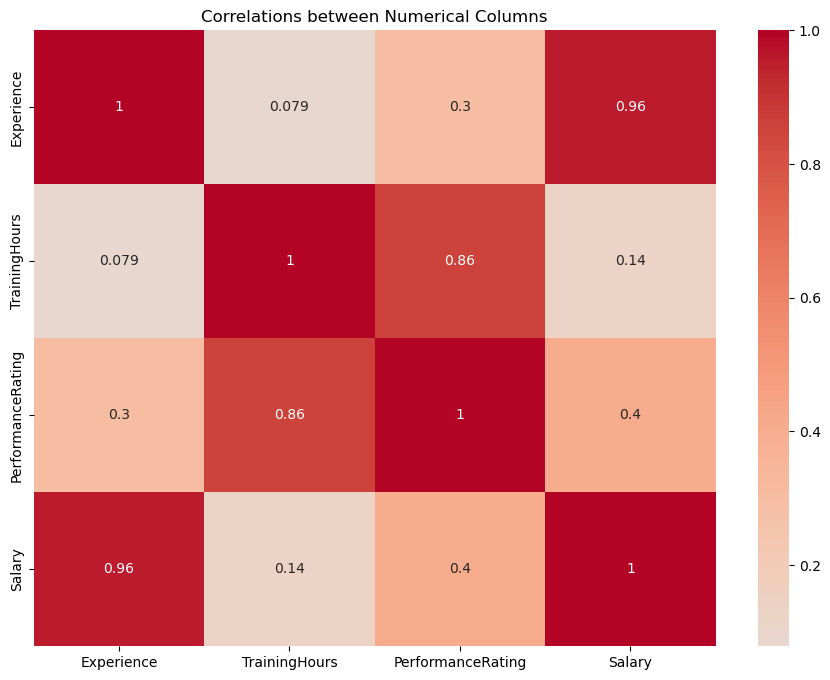

In [25]:
# Get Correlation Matrix
correlations = df[numerical_columns].corr()
print(round(correlations, 2))

# Plot Heat Map
plt.figure(figsize=(11, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title("Correlations between Numerical Columns")
plt.show()

In [28]:
grouped_data = df.groupby(['Department'])

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Experience', y='PerformanceRating', data=grouped_data, palette='Set2')
plt.title('Bar Chart of Median Price by Engine Type and Body Style')
plt.xlabel('Body Style')
plt.ylabel('Median Price')
plt.show()

AttributeError: 'DataFrameGroupBy' object has no attribute 'get'

<Figure size 1000x600 with 0 Axes>

### Task 2: Assumptions, and Hypothesis Formulation (10 Marks)

### Task 3: Statistical Technique: Hypothesis Testing (20 marks)

### Task 4: Discussion and Conclusion (10 marks)

## Part Two: Regression Analysis

### Task 1: Identify Potential Predictor Variables (5 marks)

### Task 2: Assumptions for Regression Analysis (10 marks)

### Task 3: Regression Analysis (10 marks)

### Task 4: Assumptions of Linear Regression (10 marks)

### Task 5: Discussion and Conclusion (10 marks)